In [43]:
import matplotlib.pyplot as plt

import pandas as pd

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rc('font', family='GULIM')

In [44]:
pred1=pd.read_csv('Files/BiLSTM/additionalX_BZ.csv', index_col=0)
pred2=pd.read_csv('Files/Backbone_BiLSTM_SP.csv', index_col=0)

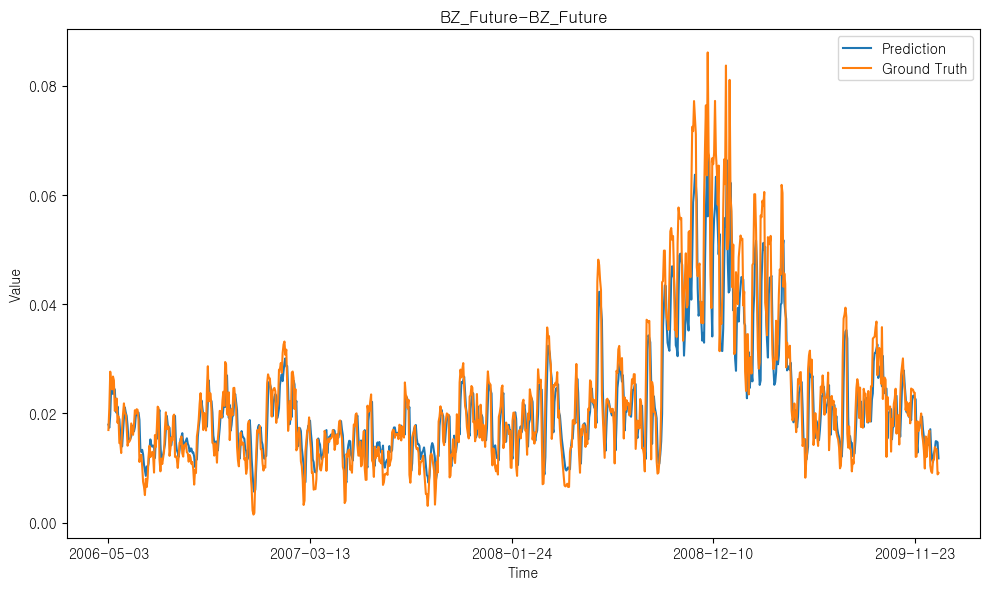

In [46]:
plt.figure(figsize=(10,6))
plt.plot( pred1['Predictions'].iloc[0:-2], label='Prediction')
plt.plot( pred1['Ground Truths'].iloc[0:-2],label='Ground Truth')
plt.title('BZ_Future-BZ_Future')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(pred1.index[0:-2:221])
plt.tight_layout()
plt.show()

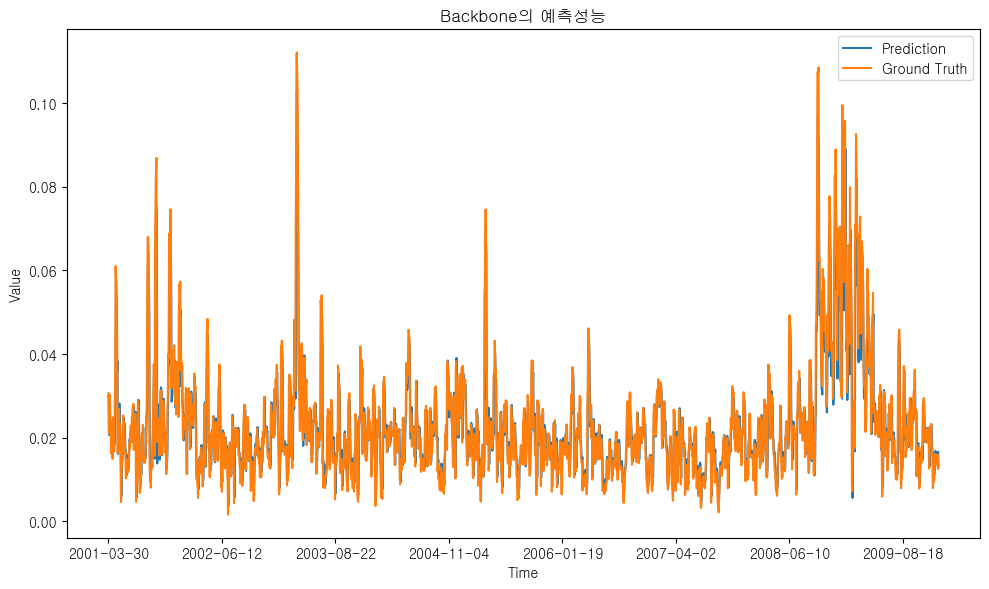

In [21]:
plt.figure(figsize=(10,6))
plt.plot( pred2['Predictions'].iloc[:-2], label='Prediction')
plt.plot( pred2['Ground Truths'].iloc[:-2],label='Ground Truth')
plt.title('Backbone의 예측성능')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(pred2.index[0:-1:300])
plt.tight_layout()
plt.show()